In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G = nx.krackhardt_kite_graph()

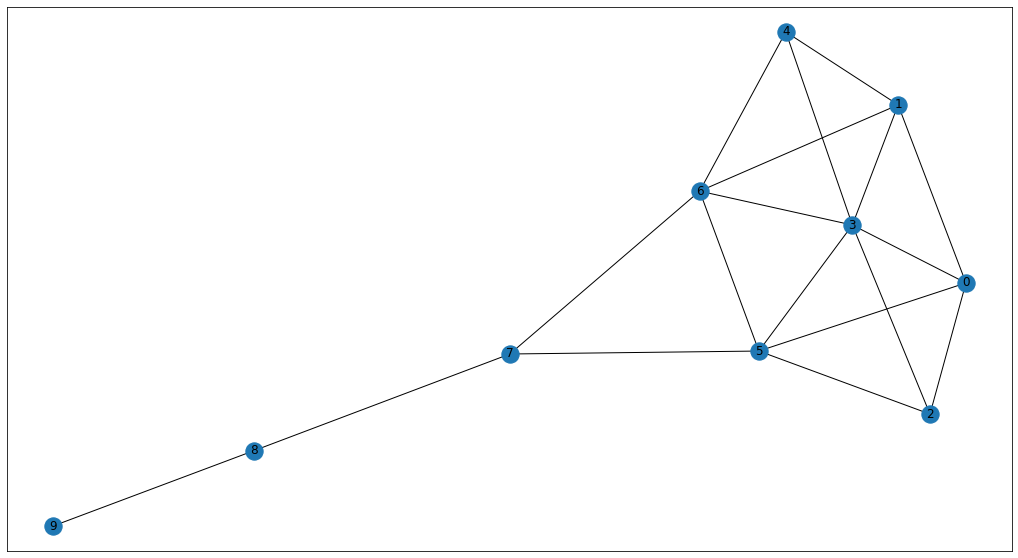

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G)
plt.show()

# Скільки NODES та EDGES?

In [4]:
len(G.nodes()), len(G.edges())

(10, 18)

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [6]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

# Міри центральності мережі: Centrality, Betweenness, Closeness

In [8]:
# centrality
G.degree()

DegreeView({0: 4, 1: 4, 2: 3, 3: 6, 4: 3, 5: 5, 6: 5, 7: 3, 8: 2, 9: 1})

In [9]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [10]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

# Cliques

In [11]:
# largest cliques
[clq for clq in nx.enumerate_all_cliques(G) if len(clq) >= nx.graph_clique_number(G)]

[[0, 2, 3, 5], [1, 3, 4, 6]]

In [12]:
# size of largest clique
nx.graph_clique_number(G)

4

In [13]:
# all cliques
[*nx.enumerate_all_cliques(G)]

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 5],
 [1, 3],
 [1, 4],
 [1, 6],
 [2, 3],
 [2, 5],
 [3, 4],
 [3, 5],
 [3, 6],
 [4, 6],
 [5, 6],
 [5, 7],
 [6, 7],
 [7, 8],
 [8, 9],
 [0, 1, 3],
 [0, 2, 3],
 [0, 2, 5],
 [0, 3, 5],
 [1, 3, 4],
 [1, 3, 6],
 [1, 4, 6],
 [2, 3, 5],
 [3, 4, 6],
 [3, 5, 6],
 [5, 6, 7],
 [0, 2, 3, 5],
 [1, 3, 4, 6]]

# Effective network size

In [14]:
nx.effective_size(G)

{0: 2.0,
 1: 2.0,
 2: 1.0,
 3: 3.3333333333333335,
 4: 1.0,
 5: 3.0,
 6: 3.0,
 7: 2.3333333333333335,
 8: 2.0,
 9: 1.0}

In [81]:
def borgattis_effective_size(E: nx.classes.graph.Graph):
    """ Формула borgatti в python, де `E` є его-мережею
    
        number_of_nodes - (2 * number_of_edges) / number_of_nodes
    
    
    Examples
    --------
    >>> effective_size = {v: borgattis_effective_size(nx.ego_graph(G, v, center=False, undirected=True)) for v in G}
    {0: 2.0,
     1: 2.0,
     2: 1.0,
     3: 3.3333333333333335,
     4: 1.0,
     5: 3.0,
     6: 3.0,
     7: 2.3333333333333335,
     8: 2.0,
     9: 1.0}
    """
    return len(E) - (2 * E.size() / len(E))

In [83]:
# effective_size = {}
# # Use Borgatti's simplified formula for unweighted and undirected graphs
# for v in G:
#     E = nx.ego_graph(G, v, center=False, undirected=True)
#     effective_size[v] = len(E) - (2 * E.size()) / len(E)

In [84]:
effective_size = {v: borgattis_effective_size(nx.ego_graph(G, v, center=False, undirected=True)) for v in G}
effective_size

{0: 2.0,
 1: 2.0,
 2: 1.0,
 3: 3.3333333333333335,
 4: 1.0,
 5: 3.0,
 6: 3.0,
 7: 2.3333333333333335,
 8: 2.0,
 9: 1.0}

# Приклад розрахунку `effective size` для *NODE* `3`

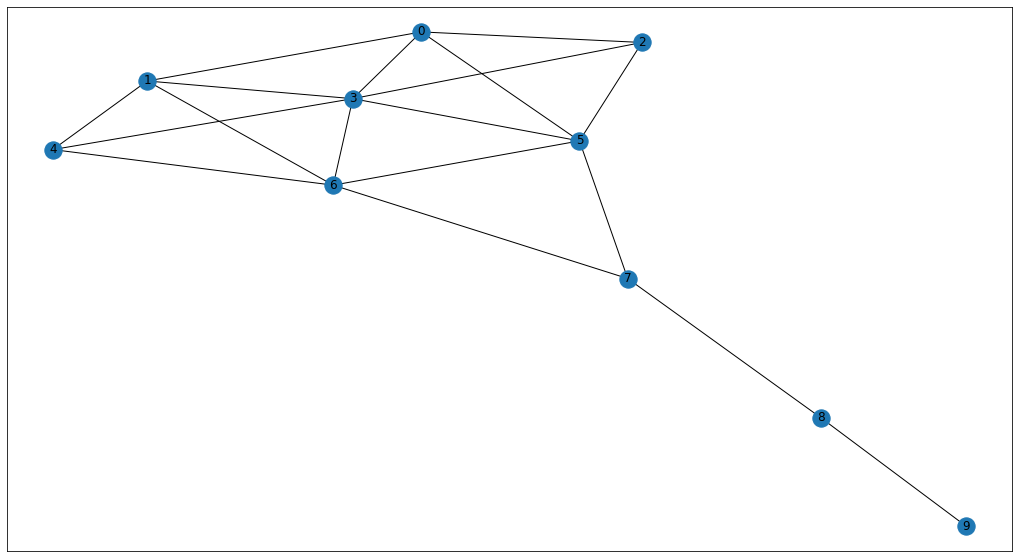

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
nx.draw_networkx(G)
plt.show()

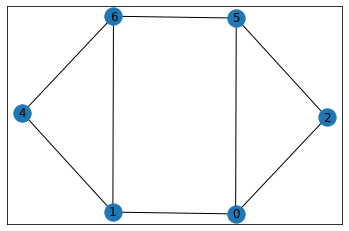

In [71]:
# его-мережа точки 3
E = nx.ego_graph(G, 3, center=False, undirected=True)
nx.draw_networkx(E)

In [80]:
number_of_nodes = len(E.nodes())
number_of_edges = len(E.edges())
print(f"{number_of_nodes=}, Nodes: {E.nodes()}")
print(f"{number_of_edges=}, Edges: {E.edges()}")
print("Formula: number_of_nodes - (2 * number_of_edges) / number_of_nodes")
print(number_of_nodes - (2 * number_of_edges) / number_of_nodes)

number_of_nodes=6, Nodes: [0, 1, 2, 4, 5, 6]
number_of_edges=8, Edges: [(0, 1), (0, 2), (0, 5), (1, 4), (1, 6), (2, 5), (4, 6), (5, 6)]
Formula: number_of_nodes - (2 * number_of_edges) / number_of_nodes
3.3333333333333335
